## Lab Random Forest

# 1. Split the dataset into training and test data: 


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


data = load_breast_cancer()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 2. Create and train RF model:

In [3]:
from sklearn.ensemble import RandomForestClassifier

RFmodel = RandomForestClassifier(random_state=0)

RFmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# 3. Hyperparameters for a random forest:

-n_estimators: The number of trees in the forest.

-max_depth: The maximum depth of the trees.

-min_samples_split: The minimum number of samples required to split an internal node.

-min_samples_leaf: The minimum number of samples required to be at a leaf node.

-max_features: The number of features to consider when looking for the best split.


# 4. Compute the score for both training and testing:

In [4]:
train_score = RFmodel.score(X_train, y_train)
test_score = RFmodel.score(X_test, y_test)
print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 1.0
Testing Score: 0.9590643274853801


# 5. Generate confusion matrix for testing data:

In [5]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, RFmodel.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 60   3]
 [  4 104]]


# 6. Choose the best hyperparameters:

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7], 'n_estimators': list(range(10, 200, 10))}

grid_search = GridSearchCV(RFmodel, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 7, 'n_estimators': 60}


# 7. Interpretation of the model: Feature Importance

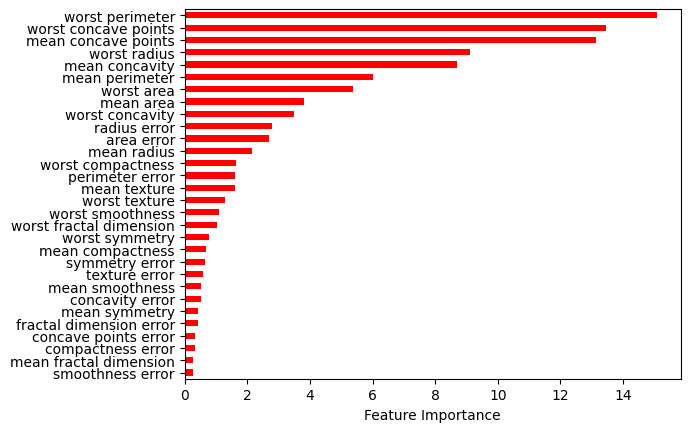

In [7]:
import matplotlib.pyplot as plt
import pandas as pd


importance_df = pd.DataFrame({'Importance': RFmodel.feature_importances_ * 100}, index=data.feature_names)


importance_df.sort_values(by='Importance', axis=0, ascending=True, inplace=True)


importance_df.plot(kind='barh', color='r')
plt.xlabel('Feature Importance')
plt.gca().legend_ = None
plt.show()


# 8. Do the most important features change with different number of trees?